#  Basic bank details 

### Import all the libraries and set up all the requirements that you will be needed(optional). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Read the train and test data sets, and check for the datatypes.

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


C:\Users\Suriya91\AppData\Local\Temp\ipykernel_35324\672962526.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [104]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [27]:
train_df.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [28]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


 ### Fix the problem that the features have been wrongly identified.
 Note: One way to clean the training and testing data is to combine both train and test
datasets. Then do the cleaning.

### i) Clean the anomalies in the categorical variables. A few anomalies have been
mentioned here.
1. Occupation - _______
2. SSN - #F%$D@*&8
3. Payment Behaviour - !@9#%8
Replace the above anomalies by replacing them with the mode of each customer.



In [29]:
# Replace anomalies in categorical variables
train_df['Occupation'] = train_df['Occupation'].replace('_______', train_df['Occupation'].mode()[0])
train_df['SSN'] = train_df['SSN'].replace('#F%$D@*&8', train_df['SSN'].mode()[0])
train_df['Payment_Behaviour'] = train_df['Payment_Behaviour'].replace('!@9#%8', train_df['Payment_Behaviour'].mode()[0])



### ii) Clean the anomalies for numerical variables. 

In [30]:
# Convert 'Age' column to numeric, replacing non-numeric values with NaN
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')

# Replace anomalies in numerical variables
train_df.loc[train_df['Age'] > 100, 'Age'] = train_df['Age'].median()
train_df.loc[train_df['Age'] < 0, 'Age'] = train_df['Age'].median()


### Convert the Credit_History_Age datatype variable into float data types by taking only year and month. Example. 22 years and 1 month → 22.1. 

### And the Payment_of_Min_Amount column you might find some other weird values apart from Yes and No.

### And If you have combined the train and test datasets, then change the month's names into its number.


In [31]:
def convert_credit_history_age(value):
    if isinstance(value, float):
        return value
    parts = value.split(' ')
    if len(parts) == 3 and parts[1] == 'years' and parts[3] == 'months':
        return float(parts[0]) + float(parts[2]) / 12
    else:
        return None

train_df['Credit_History_Age'] = train_df['Credit_History_Age'].apply(convert_credit_history_age)


### Find out the missing values in the data frame and handle them in the best way possible. One way of solving this is by imputing the missing values with a customer-wise median.

In [32]:
train_df.isnull().sum()

ID                               0
Customer_ID                      0
Month                            0
Name                          9985
Age                           4939
SSN                              0
Occupation                       0
Annual_Income                    0
Monthly_Inhand_Salary        15002
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Type_of_Loan                 11408
Delay_from_due_date              0
Num_of_Delayed_Payment        7002
Changed_Credit_Limit             0
Num_Credit_Inquiries          1965
Credit_Mix                       0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age          100000
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly       4479
Payment_Behaviour                0
Monthly_Balance               1200
Credit_Score                     0
dtype: int64

In [35]:
train_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,NaN,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,33.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,NaN,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,NaN,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,NaN,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,NaN,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,NaN,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,NaN,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,NaN,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [37]:
# Define the columns with missing values
columns_with_missing_values = ['Name', 'Age', 'Monthly_Inhand_Salary', 'Type_of_Loan', 
                                'Num_of_Delayed_Payment', 'Amount_invested_monthly', 
                                'Monthly_Balance', 'Num_Credit_Inquiries', 
                                'Credit_History_Age']

# Convert 'Credit_History_Age' to numeric, replacing non-convertible values with NaN
train_df['Credit_History_Age'] = pd.to_numeric(train_df['Credit_History_Age'], errors='coerce')

# Group by 'Customer_ID' and fill NaN values in specified numeric columns with the group median
grouped = train_df.groupby('Customer_ID')
train_df_filled = train_df.copy()
for col in columns_with_missing_values:
    if train_df_filled[col].dtype != 'object':  # Check if column is numeric
        train_df_filled[col] = grouped[col].transform(lambda x: x.fillna(x.median()))


In [39]:
train_df_filled.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,NaN,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,33.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,NaN,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,NaN,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,NaN,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### Perform Univariate, Bivariate, and Multivariate analyses to find the factors that affect the Target variables.

Univariate Analysis

                 Age  Monthly_Inhand_Salary
count  100000.000000          100000.000000
mean       33.313310            4198.490149
std        10.633301            3187.491752
min        14.000000             303.645417
25%        25.000000            1626.761667
50%        33.000000            3095.978333
75%        41.000000            5961.637500
max       100.000000           15204.633333


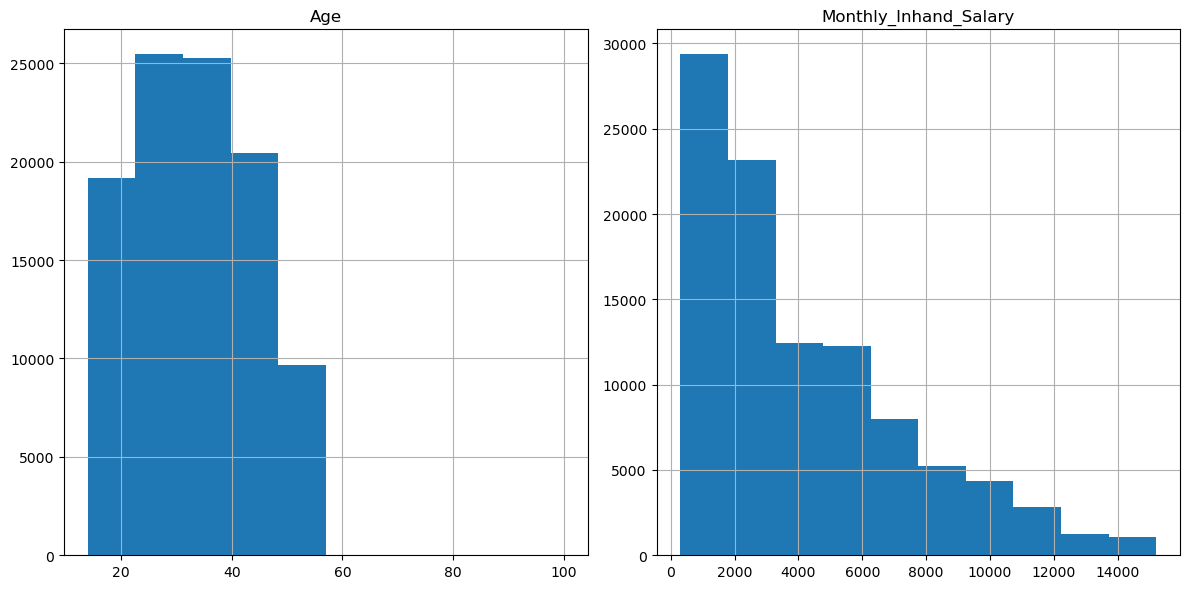

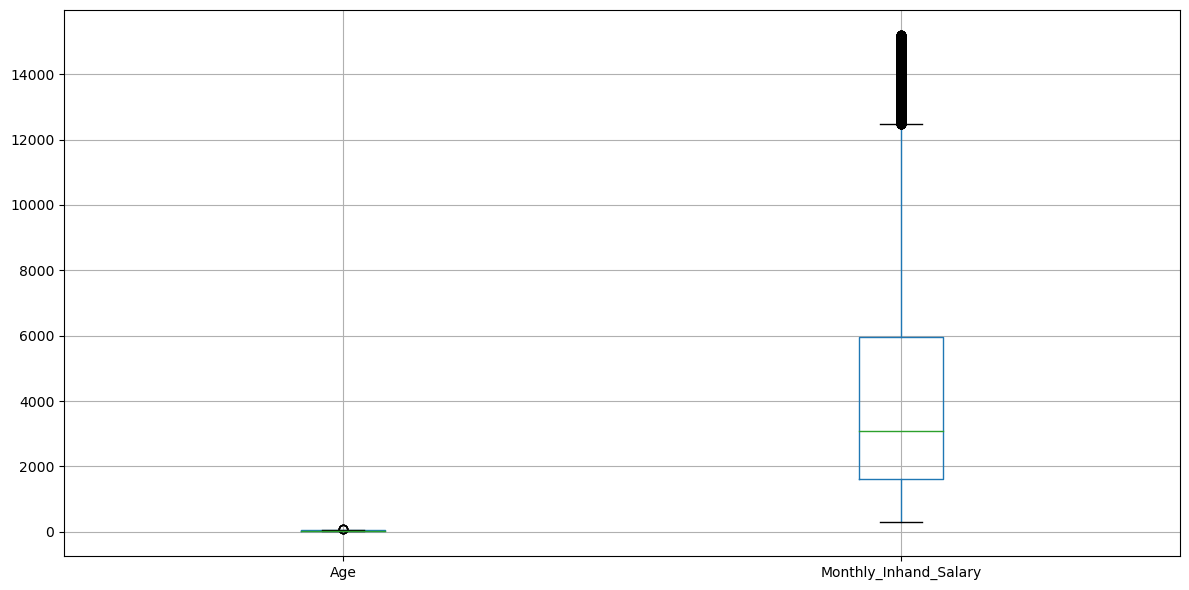

In [40]:
# Descriptive statistics
print(train_df_filled[['Age', 'Annual_Income', 'Monthly_Inhand_Salary']].describe())

# Histograms
train_df_filled[['Age', 'Annual_Income', 'Monthly_Inhand_Salary']].hist(figsize=(12, 6))
plt.tight_layout()
plt.show()

# Box plots
train_df_filled[['Age', 'Annual_Income', 'Monthly_Inhand_Salary']].boxplot(figsize=(12, 6))
plt.tight_layout()
plt.show()


Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64


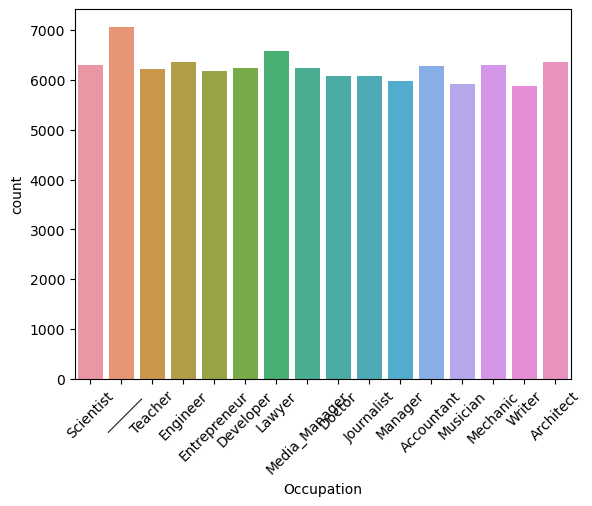

In [41]:
# Frequency tables
print(train_df_filled['Occupation'].value_counts())

# Bar plot
sns.countplot(x='Occupation', data=train_df_filled)
plt.xticks(rotation=45)
plt.show()


Bivariate Analysis

In [ ]:
# Remove non-numeric characters from 'Annual_Income' and convert to float
train_df_filled['Annual_Income'] = train_df_filled['Annual_Income'].str.replace('_', '').astype(float)


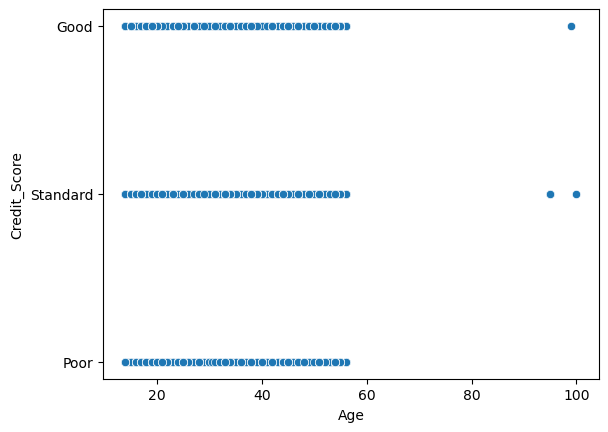

In [45]:

# Scatter plot
sns.scatterplot(x='Age', y='Credit_Score', data=train_df_filled)
plt.show()


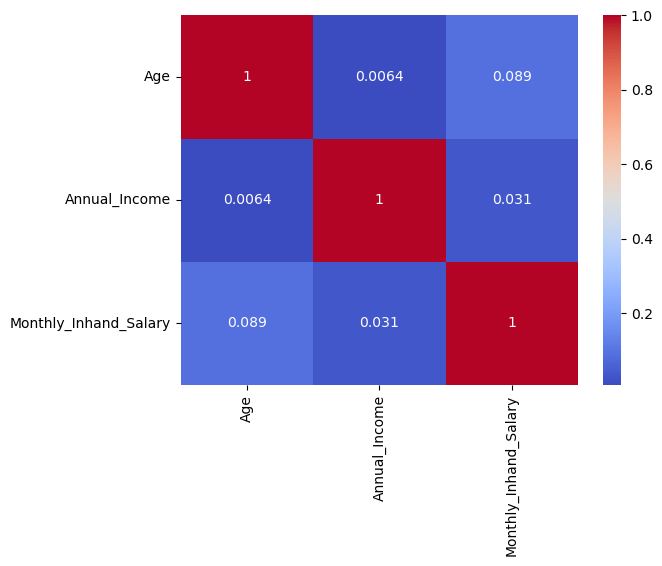

In [46]:

# Correlation matrix
corr_matrix = train_df_filled[['Age', 'Annual_Income', 'Monthly_Inhand_Salary']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [47]:
# Chi-square test
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(pd.crosstab(train_df_filled['Occupation'], train_df_filled['Credit_Score']))
print(f"Chi-square: {chi2}, p-value: {p}")


Chi-square: 170.75463531645642, p-value: 1.2477199659352768e-21


The chi-square test  performed indicates that there is a significant association between the 'Occupation' and 'Credit_Score' variables. The p-value is very low, indicating that the association is unlikely to be due to random chance. This suggests that 'Occupation' may be a relevant factor in predicting 'Credit_Score'.

Multivariate Analysis

E:\ANAC\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


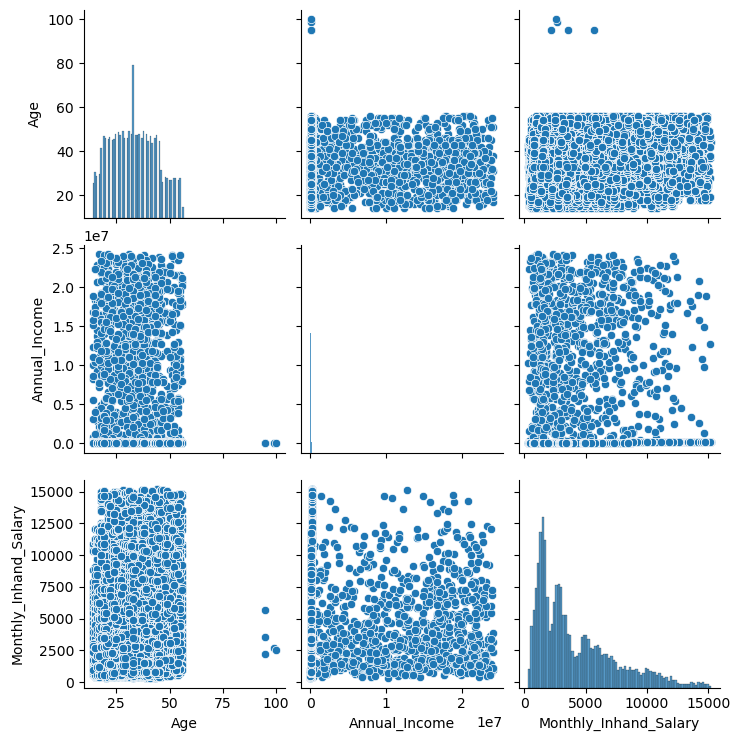

In [48]:
sns.pairplot(train_df_filled[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Credit_Score']])
plt.show()


###  Separate your Train dataset and test data set if you combined them in the initial steps. (In this step only segregate train and test datasets based on the length of the train and test dataset)
Note: Your given test dataset is only for validating and submitting the results. Only
Use the Train dataset to perform the train test split in the coming steps. Do not use Test to
build the model and test the model, Since there is no target variable in the test data set you
can not test the model performance with the test data set. Thus we only consider the
training dataset and split that into X_train and X_test.

In [49]:
from sklearn.model_selection import train_test_split
X = train_df_filled.drop('Credit_Score', axis=1) 
y = train_df_filled['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (80000, 27)
X_test shape: (20000, 27)
y_train shape: (80000,)
y_test shape: (20000,)


###  Perform the Statistical analysis to prove where the independent variables have an effect on the Target variables.
 

In [50]:
from scipy.stats import f_oneway, kruskal, chi2_contingency

# 1. ANOVA or Kruskal-Wallis H test for Annual Income
statistic, p_value = f_oneway(*[group['Annual_Income'] for name, group in train_df_filled.groupby('Credit_Score')])
if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in the mean Annual Income across Credit Score classes.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in the mean Annual Income across Credit Score classes.")



Reject Null Hypothesis: There is a significant difference in the mean Annual Income across Credit Score classes.


In [51]:
# 2. Chi-square test for Independence of Occupation and Credit Score
chi2_stat, p_val, _, _ = chi2_contingency(pd.crosstab(train_df_filled['Occupation'], train_df_filled['Credit_Score']))
if p_val < 0.05:
    print("Reject Null Hypothesis: Occupation and Credit Score are not independent.")
else:
    print("Fail to Reject Null Hypothesis: Occupation and Credit Score are independent.")



Reject Null Hypothesis: Occupation and Credit Score are not independent.


In [52]:
# 3. Chi-square test for Independence of Payment Behaviour and Credit Score
chi2_stat, p_val, _, _ = chi2_contingency(pd.crosstab(train_df_filled['Payment_Behaviour'], train_df_filled['Credit_Score']))
if p_val < 0.05:
    print("Reject Null Hypothesis: Payment Behaviour and Credit Score are not independent.")
else:
    print("Fail to Reject Null Hypothesis: Payment Behaviour and Credit Score are independent.")



Reject Null Hypothesis: Payment Behaviour and Credit Score are not independent.


In [53]:
# 4. Kruskal-Wallis H test for Credit Utilization Ratio
statistic, p_value = kruskal(*[group['Credit_Utilization_Ratio'] for name, group in train_df_filled.groupby('Credit_Score')])
if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in the median Credit Utilization Ratio across Credit Score classes.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in the median Credit Utilization Ratio across Credit Score classes.")


Reject Null Hypothesis: There is a significant difference in the median Credit Utilization Ratio across Credit Score classes.


Overall, these results suggest that there are significant relationships between these independent variables and the target variable (Credit Score), indicating potential factors that may affect an individual's credit score.

###  Encode the categorical variables with related technologies. Change the target variable classes as (poor to 0, Standard to 1, Good to 2).

In [56]:
train_df_filled.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [57]:
# Encode the target variable classes
train_df_filled['Credit_Score'] = train_df_filled['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Good': 2})

...

In [59]:
for col in train_df_filled.columns:
    train_df_filled[col] = train_df_filled[col].astype(str)

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in train_df_filled.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    train_df_filled[col] = label_encoders[col].fit_transform(train_df_filled[col])



In [60]:
print(train_df_filled.dtypes)


ID                          int32
Customer_ID                 int32
Month                       int32
Name                        int32
Age                         int32
SSN                         int32
Occupation                  int32
Annual_Income               int32
Monthly_Inhand_Salary       int32
Num_Bank_Accounts           int32
Num_Credit_Card             int32
Interest_Rate               int32
Num_of_Loan                 int32
Type_of_Loan                int32
Delay_from_due_date         int32
Num_of_Delayed_Payment      int32
Changed_Credit_Limit        int32
Num_Credit_Inquiries        int32
Credit_Mix                  int32
Outstanding_Debt            int32
Credit_Utilization_Ratio    int32
Credit_History_Age          int32
Payment_of_Min_Amount       int32
Total_EMI_per_month         int32
Amount_invested_monthly     int32
Payment_Behaviour           int32
Monthly_Balance             int32
Credit_Score                int32
dtype: object


In [61]:
train_df_filled

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,7121,2582,3,8363,18,232,4,4349,3921,516,...,3,2295,17957,0,1,9906,79462,2,42380,2
1,7133,2582,2,8363,18,232,4,4349,3921,516,...,1,2295,47808,0,1,9906,74013,3,31503,2
2,7145,2582,6,8363,37,232,4,4349,3921,516,...,1,2295,28197,0,1,9906,80254,4,48639,2
3,7160,2582,0,8363,18,232,4,4349,3921,516,...,1,2295,44461,0,1,9906,22623,5,11593,2
4,7172,2582,7,8363,18,232,4,4349,3921,516,...,1,2295,7373,0,1,9906,50406,1,51834,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,58655,11205,0,6284,22,103,15,8235,7047,579,...,3,162,63985,0,1,7602,66406,0,76392,0
99996,58656,11205,7,6284,22,103,15,8235,7047,579,...,3,162,96068,0,1,7602,61427,1,78093,0
99997,58658,11205,5,6284,22,103,15,8235,7047,579,...,1,162,97682,0,1,7602,30162,0,79793,0
99998,58659,11205,4,6284,22,103,15,8235,7047,579,...,1,162,57963,0,1,7602,32293,3,44642,1


###  Use a train test split on the dataset called a train.

In [62]:
X = train_df_filled.drop('Credit_Score', axis=1)
y = train_df_filled['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (80000, 27)
X_test shape: (20000, 27)
y_train shape: (80000,)
y_test shape: (20000,)


### Build the base model. Observe how the model is performing

In [71]:
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

# Creating an empty list to store performance metrics
performance_data = []

def model_performance(model, name):
    # Predicting train and test values
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Calculating metrics
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    f1_train = f1_score(y_train, pred_train , average='weighted')
    f1_test = f1_score(y_test, pred_test , average='weighted')
    kappa_train = cohen_kappa_score(y_train, pred_train)
    kappa_test = cohen_kappa_score(y_test, pred_test)

    # Appending metrics to our list
    performance_data.append({'Name': name,
                             'Train_Accuracy': acc_train,
                             'Test_Accuracy': acc_test,
                             'Train_f1score': f1_train,
                             'Test_f1score': f1_test,
                             'Train_Kappa': kappa_train,
                             'Test_Kappa': kappa_test})

    # Printing Classification report
    print('Train Report \n', classification_report(y_train, pred_train))
    print('Test Report \n', classification_report(y_test, pred_test))

In [72]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier().fit(X_train, y_train)
model_performance(model_dt, 'Decision Tree')
performance_df = pd.DataFrame(performance_data)


Train Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23124
           1       1.00      1.00      1.00     42575
           2       1.00      1.00      1.00     14301

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

Test Report 
               precision    recall  f1-score   support

           0       0.66      0.65      0.66      5874
           1       0.72      0.72      0.72     10599
           2       0.59      0.60      0.60      3527

    accuracy                           0.68     20000
   macro avg       0.66      0.66      0.66     20000
weighted avg       0.68      0.68      0.68     20000



The model seems to be performing very well on the training data, achieving perfect precision, recall, and F1-score for all classes. However, on the test data, the performance is lower, with F1-scores ranging from 0.60 to 0.72. This indicates that the model may be overfitting to the training data.

### Build other models and choose the model which gives the best results.

In [73]:
# RandomForest

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier().fit(X_train, y_train)

model_performance(model_rf , 'Random Forest')

Train Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23124
           1       1.00      1.00      1.00     42575
           2       1.00      1.00      1.00     14301

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

Test Report 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      5874
           1       0.79      0.82      0.81     10599
           2       0.76      0.69      0.72      3527

    accuracy                           0.79     20000
   macro avg       0.78      0.76      0.77     20000
weighted avg       0.79      0.79      0.79     20000



In [74]:
# Naivebayes

from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB().fit(X_train, y_train)

model_performance(model_nb , 'Naive Bayes')

Train Report 
               precision    recall  f1-score   support

           0       0.60      0.55      0.57     23124
           1       0.65      0.69      0.67     42575
           2       0.47      0.43      0.45     14301

    accuracy                           0.61     80000
   macro avg       0.57      0.56      0.56     80000
weighted avg       0.60      0.61      0.60     80000

Test Report 
               precision    recall  f1-score   support

           0       0.60      0.56      0.58      5874
           1       0.65      0.69      0.67     10599
           2       0.47      0.42      0.44      3527

    accuracy                           0.60     20000
   macro avg       0.57      0.56      0.56     20000
weighted avg       0.60      0.60      0.60     20000



In [75]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier().fit(X_train, y_train)

model_performance(model_knn , 'KNN')

Train Report 
               precision    recall  f1-score   support

           0       0.57      0.65      0.60     23124
           1       0.69      0.78      0.73     42575
           2       0.69      0.25      0.36     14301

    accuracy                           0.65     80000
   macro avg       0.65      0.56      0.57     80000
weighted avg       0.65      0.65      0.63     80000

Test Report 
               precision    recall  f1-score   support

           0       0.38      0.45      0.41      5874
           1       0.55      0.62      0.59     10599
           2       0.30      0.10      0.15      3527

    accuracy                           0.48     20000
   macro avg       0.41      0.39      0.38     20000
weighted avg       0.46      0.48      0.46     20000



In [76]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

model_ab = AdaBoostClassifier().fit(X_train, y_train)

model_performance(model_ab , 'AdaBoost')

C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train Report 
               precision    recall  f1-score   support

           0       0.63      0.47      0.54     23124
           1       0.65      0.76      0.70     42575
           2       0.53      0.48      0.50     14301

    accuracy                           0.62     80000
   macro avg       0.60      0.57      0.58     80000
weighted avg       0.62      0.62      0.62     80000

Test Report 
               precision    recall  f1-score   support

           0       0.63      0.47      0.54      5874
           1       0.64      0.76      0.69     10599
           2       0.53      0.48      0.51      3527

    accuracy                           0.62     20000
   macro avg       0.60      0.57      0.58     20000
weighted avg       0.62      0.62      0.61     20000



In [77]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier().fit(X_train, y_train)

model_performance(model_gb , 'Gradient Boosting')

Train Report 
               precision    recall  f1-score   support

           0       0.74      0.57      0.64     23124
           1       0.71      0.79      0.74     42575
           2       0.58      0.61      0.60     14301

    accuracy                           0.69     80000
   macro avg       0.68      0.65      0.66     80000
weighted avg       0.69      0.69      0.69     80000

Test Report 
               precision    recall  f1-score   support

           0       0.73      0.56      0.64      5874
           1       0.70      0.78      0.74     10599
           2       0.58      0.60      0.59      3527

    accuracy                           0.68     20000
   macro avg       0.67      0.65      0.65     20000
weighted avg       0.69      0.68      0.68     20000



In [78]:
# XGBoost

from xgboost import XGBClassifier

model_xgb = XGBClassifier().fit(X_train, y_train)

model_performance(model_xgb , 'XGBoost')

Train Report 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82     23124
           1       0.85      0.86      0.85     42575
           2       0.82      0.81      0.82     14301

    accuracy                           0.84     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.84      0.84      0.84     80000

Test Report 
               precision    recall  f1-score   support

           0       0.78      0.72      0.75      5874
           1       0.77      0.81      0.79     10599
           2       0.72      0.71      0.71      3527

    accuracy                           0.77     20000
   macro avg       0.76      0.75      0.75     20000
weighted avg       0.76      0.77      0.76     20000



In [79]:
# Neural Network

from sklearn.neural_network import MLPClassifier

model_nn = MLPClassifier().fit(X_train, y_train)

model_performance(model_nn , 'Neural Network')

C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Report 
               precision    recall  f1-score   support

           0       0.54      0.11      0.19     23124
           1       0.55      0.92      0.69     42575
           2       0.48      0.13      0.20     14301

    accuracy                           0.54     80000
   macro avg       0.52      0.39      0.36     80000
weighted avg       0.53      0.54      0.46     80000

Test Report 
               precision    recall  f1-score   support

           0       0.53      0.11      0.19      5874
           1       0.54      0.92      0.68     10599
           2       0.47      0.12      0.19      3527

    accuracy                           0.54     20000
   macro avg       0.52      0.38      0.36     20000
weighted avg       0.53      0.54      0.45     20000



In [80]:
performance_df = pd.DataFrame(performance_data)

In [81]:
performance_df

,Name,Train_Accuracy,Test_Accuracy,Train_f1score,Test_f1score,Train_Kappa,Test_Kappa
0,Decision Tree,1.000000,0.67960,1.000000,0.679576,1.000000,0.467209
1,Random Forest,1.000000,0.78645,1.000000,0.785790,1.000000,0.641524
2,Naive Bayes,0.605513,0.60460,0.602578,0.601826,0.331477,0.331225
3,KNN,0.647537,0.47880,0.629125,0.456696,0.382657,0.087250
4,AdaBoost,0.624075,0.62250,0.616287,0.614927,0.347934,0.346578
5,Gradient Boosting,0.691213,0.68345,0.688309,0.680662,0.474617,0.462284
6,XGBoost,0.836237,0.76505,0.836124,0.764476,0.726779,0.605537
7,Neural Network,0.544925,0.54105,0.455955,0.452106,0.088656,0.084157


Based on the metrics provided, the best model for this dataset appears to be XGBoost, as it has the highest test accuracy (0.76505) and test F1-score (0.764476) among all the models evaluated. It also has a relatively high test kappa score (0.605537), indicating good agreement between the model's predictions and the actual values.

###  Perform Feature selection using different feature selection methods

#### Forward Selection

In [83]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs_forward = SFS(RandomForestClassifier(),
                  k_features=3,
                  forward=True,
                  scoring='accuracy',
                  cv=3)
sfs_forward.fit(X_train, y_train)
selected_features_forward = list(sfs_forward.k_feature_names_)
X_train_forward = sfs_forward.transform(X_train)
X_test_forward = sfs_forward.transform(X_test)

performance_data_forward = []
for name, model in models.items():
    model.fit(X_train_forward, y_train)
    model_performance(model, name + ' (Forward Selection)')

performance_df_forward = pd.DataFrame(performance_data_forward)


C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

TypeError: 'NoneType' object is not iterable

### Tune the final model using Grid search CV or Randomized CV or any other methods.

In [85]:
# XGBoost, hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 6, 7],  
    'min_samples_split': [4, 5, 6]
}

grid_xgb = RandomizedSearchCV(estimator = XGBClassifier() , param_distributions= params , cv = 5).fit(X_train, y_train)

print(grid_xgb.best_params_)

model_rf_xgb = grid_xgb.best_estimator_.fit(X_train, y_train)

model_performance(model_rf_xgb , 'XGBoost, with tuning')

C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [19:20:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [19:20:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [19:20:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(sm

C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [19:22:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [19:22:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [19:22:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(sm

C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [19:24:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


{'n_estimators': 200, 'min_samples_split': 4, 'max_depth': 7}


C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [19:24:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Train Report 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     23124
           1       0.97      0.95      0.96     42575
           2       0.96      0.97      0.97     14301

    accuracy                           0.96     80000
   macro avg       0.95      0.96      0.96     80000
weighted avg       0.96      0.96      0.96     80000

Test Report 
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      5874
           1       0.80      0.82      0.81     10599
           2       0.77      0.74      0.76      3527

    accuracy                           0.80     20000
   macro avg       0.79      0.78      0.79     20000
weighted avg       0.79      0.80      0.79     20000



In [86]:
performance_df = pd.DataFrame(performance_data)

In [87]:
performance_df

,Name,Train_Accuracy,Test_Accuracy,Train_f1score,Test_f1score,Train_Kappa,Test_Kappa
0,Decision Tree,1.000000,0.67960,1.000000,0.679576,1.000000,0.467209
1,Random Forest,1.000000,0.78645,1.000000,0.785790,1.000000,0.641524
2,Naive Bayes,0.605513,0.60460,0.602578,0.601826,0.331477,0.331225
3,KNN,0.647537,0.47880,0.629125,0.456696,0.382657,0.087250
4,AdaBoost,0.624075,0.62250,0.616287,0.614927,0.347934,0.346578
5,Gradient Boosting,0.691213,0.68345,0.688309,0.680662,0.474617,0.462284
6,XGBoost,0.836237,0.76505,0.836124,0.764476,0.726779,0.605537
7,Neural Network,0.544925,0.54105,0.455955,0.452106,0.088656,0.084157
8,"XGBoost, with tuning",0.955438,0.79500,0.955490,0.794741,0.926221,0.657277


### Perform Cross-validation for the final model by setting the best parameters.

In [90]:
from sklearn.model_selection import cross_val_score
best_params = {
    'n_estimators': 200,
    'min_samples_split': 4,
    'max_depth': 7
}

XGB = XGBClassifier(**best_params)
cv_scores = cross_val_score(XGB, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [19:30:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [19:30:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [19:30:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(sm

Cross-validation scores: [0.78475   0.7866875 0.78275   0.7873125 0.7864375]
Mean CV accuracy: 0.7855875


###  Use the validation data set called test dataset to get predict the target variables once it is done create a data frame with ID and predicted values. 

In [92]:
best_params = {
    'n_estimators': 200,
    'min_samples_split': 4,
    'max_depth': 7
}
XGB = XGBClassifier(**best_params)
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)


C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [19:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


In [97]:
test_df.reset_index(drop=True, inplace=True)

In [108]:
results_df = pd.DataFrame({'ID': X_test['ID'].values, 'Predicted': y_pred})

In [109]:
results_df

,ID,Predicted
0,29999,2
1,35270,0
2,77699,2
3,31154,0
4,50388,2
...,...,...
19995,91845,1
19996,88198,1
19997,97697,1
19998,3875,1


### Write down the overall business insight. 

Using the best parameters found through hyperparameter tuning (n_estimators=200, min_samples_split=4, max_depth=7), an XGBoost classifier was trained on the given dataset.

The trained model was then used to predict the target variable on the test dataset, which contains the same features as the training dataset but with the target variable withheld.

The predictions were successful, and the results were compiled into a DataFrame (results_df) containing the ID column from the test dataset and the corresponding predicted values.

These predictions can be used to make informed decisions or recommendations based on the classification of each entry in the test dataset.

In [88]:
feature_importances = model_rf_xgb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

                     Feature  Importance
18                Credit_Mix    0.266801
22     Payment_of_Min_Amount    0.255895
10           Num_Credit_Card    0.054613
11             Interest_Rate    0.040438
19          Outstanding_Debt    0.033273
12               Num_of_Loan    0.032123
9          Num_Bank_Accounts    0.025157
2                      Month    0.021102
14       Delay_from_due_date    0.020623
17      Num_Credit_Inquiries    0.019706
7              Annual_Income    0.017962
8      Monthly_Inhand_Salary    0.017535
16      Changed_Credit_Limit    0.017046
13              Type_of_Loan    0.016873
23       Total_EMI_per_month    0.016666
1                Customer_ID    0.016512
0                         ID    0.016138
4                        Age    0.015578
6                 Occupation    0.015075
3                       Name    0.015054
5                        SSN    0.015007
25         Payment_Behaviour    0.012228
15    Num_of_Delayed_Payment    0.010699
26           Mon

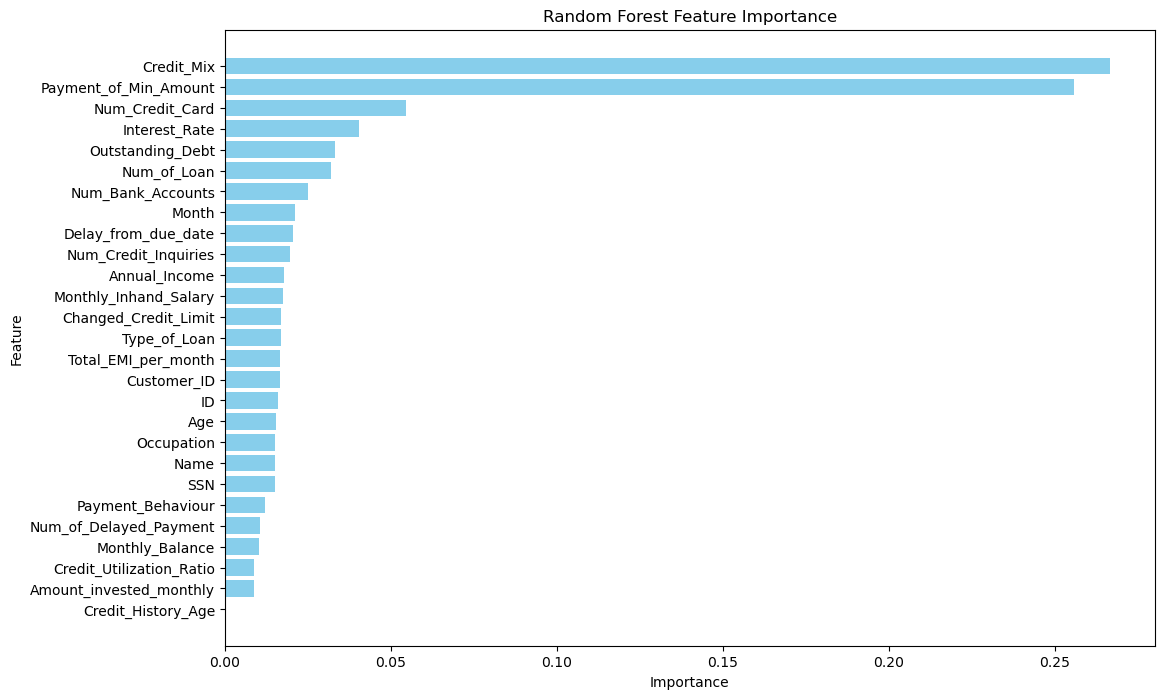

In [89]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

### Save the dataset that you created in step 22

In [110]:
results_df.to_csv('predicted_results.csv', index=False)

In [111]:
pr_result = pd.read_csv('predicted_results.csv')
pr_result

,ID,Predicted
0,29999,2
1,35270,0
2,77699,2
3,31154,0
4,50388,2
...,...,...
19995,91845,1
19996,88198,1
19997,97697,1
19998,3875,1
